In [136]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import holidays
import seaborn as sns


The data is ordered date wise in different files, so just concat all files.
92% of the data points don't have location2 or location3 (or neither) so they were excluded from the analysis

Some of the data points' time_of_infraction seemed wrong since they were going beyond 24 hr clock, for hourly analysis, those data points are removed/ 

In [130]:
folder_path = "data"
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

data_frames = []

for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenate all data frames into a single data frame
df = pd.concat(data_frames, ignore_index=True)

df.to_csv("data.csv", index=False)

In [131]:
df = df.drop_duplicates()

In [132]:
# total fine amount in 4 years
df['set_fine_amount'].sum()

385386215

In [133]:
missing_values = (df.isna().sum()/df.shape[0])*100

print("These are the missing values as percentage of total data points")
print(missing_values)

These are the missing values as percentage of total data points
tag_number_masked          0.000000
date_of_infraction         0.000000
infraction_code            0.000013
infraction_description     0.000000
set_fine_amount            0.000000
time_of_infraction         0.078708
location1                  9.941861
location2                  0.009915
location3                 92.986562
location4                 92.962760
province                   0.000013
dtype: float64


In [138]:
rows_with_na_location2_or_location3 = df[df['location2'].isna() | df['location3'].isna()]

df = df.drop(columns={"location3", "location4"})


In [139]:
# most occuring infractions

top_infractions = df['infraction_description'].value_counts()
top_infractions

#top_infractions.describe()

PARK ON PRIVATE PROPERTY          1556872
PARK-SIGNED HWY-PROHIBIT DY/TM    1255873
PARK PROHIBITED TIME NO PERMIT    1074560
PARK MACHINE-REQD FEE NOT PAID     985533
PARK - LONGER THAN 3 HOURS         448140
                                   ...   
STOP/STAND/PARK DESIGNATE AREA          1
PARK ON PRIV PROP WITHOUT CONS          1
STAND VEH-HWY-PROH TIME/DAYS            1
STAND SIGN HWY PRO TIMES/DAYS           1
STAND HANDICAP LOADING ZONE             1
Name: infraction_description, Length: 246, dtype: int64

                                                Total_Fines
infraction_description         infraction_code             
FAIL TO PARK/STOP PARALL. CURB 48.0                  523020
FAIL TO PARK/STOP PARALL. RGHT 49.0                  351120
PARK - BETWEEN ROAD & SIDEWALK 338.0                 307400
PARK - BOULEVD NO VALID PLATES 339.0                  11850
PARK - LONGER THAN 3 HOURS     2.0                  8439090
...                                                     ...
STOP-NON-SCHL BUS IN SCHL LDZN 99.0                  243620
STOP-ROAD SIDE-STOP/PARK VEH.  31.0                  921150
STOP-SIGNED HIGHWAY-RUSH HOUR  403.0               34177500
STOP-SIGNED HWY-PROHIBIT TM/DY 9.0                 27277480
STOP-WITHIN (INTERSCTN/PED X)  57.0                   21000

[93 rows x 1 columns]


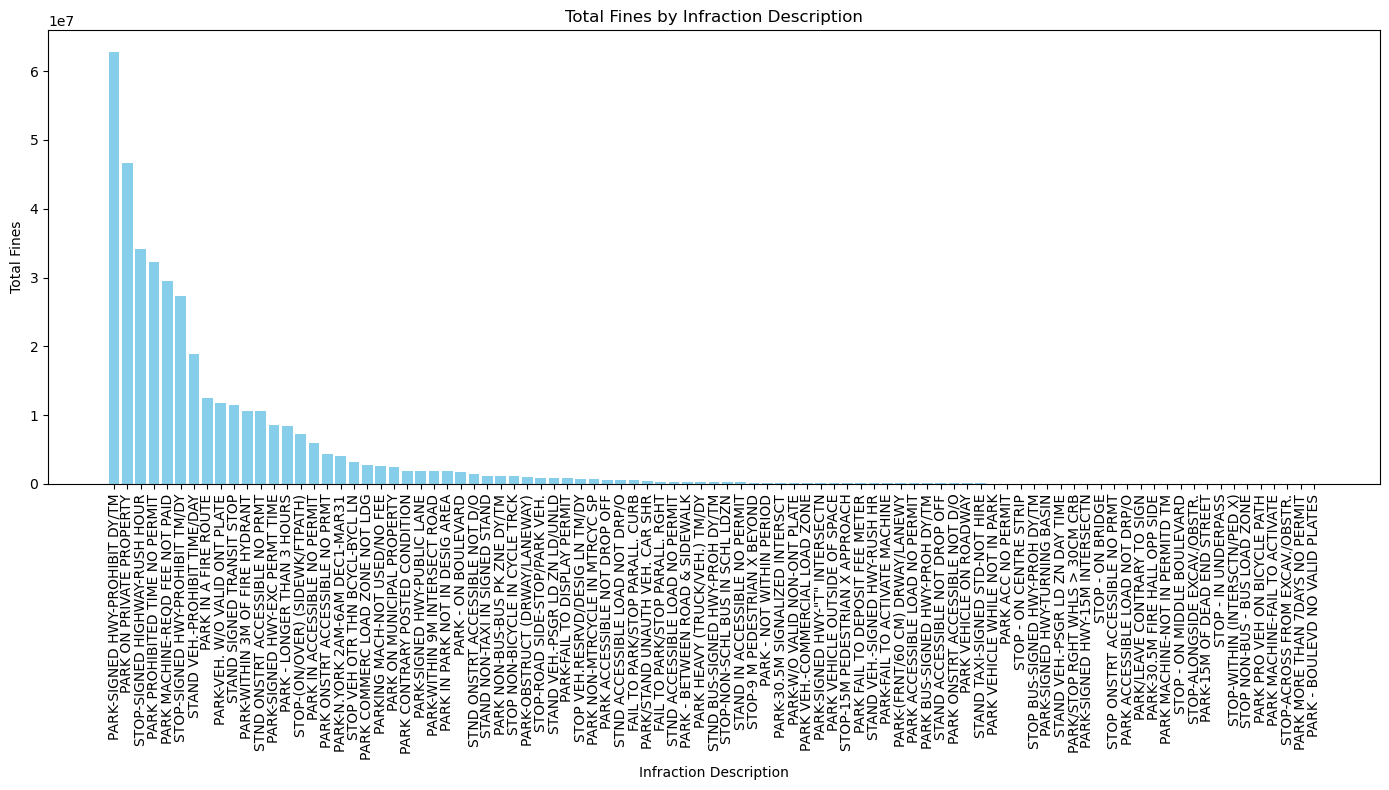

In [140]:
# most fined infractions

grouped_fines = df.groupby(['infraction_description', 'infraction_code']).agg(
    Total_Fines=('set_fine_amount', 'sum'),
    #Count=('set_fine_amount', 'size')
)


# Sort in decreasing 
grouped_fines = grouped_fines[grouped_fines['Total_Fines'] > 11625] # to reduce noise and make graphs more understandable

grouped_fines_sorted = grouped_fines.sort_values('Total_Fines', ascending=False).reset_index()

print(grouped_fines)

plt.figure(figsize=(14, 8))
plt.bar(grouped_fines_sorted['infraction_description'], 
        grouped_fines_sorted['Total_Fines'], color='skyblue')
plt.xlabel('Infraction Description')
plt.ylabel('Total Fines')
plt.title('Total Fines by Infraction Description')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit x-axis labels
plt.show()


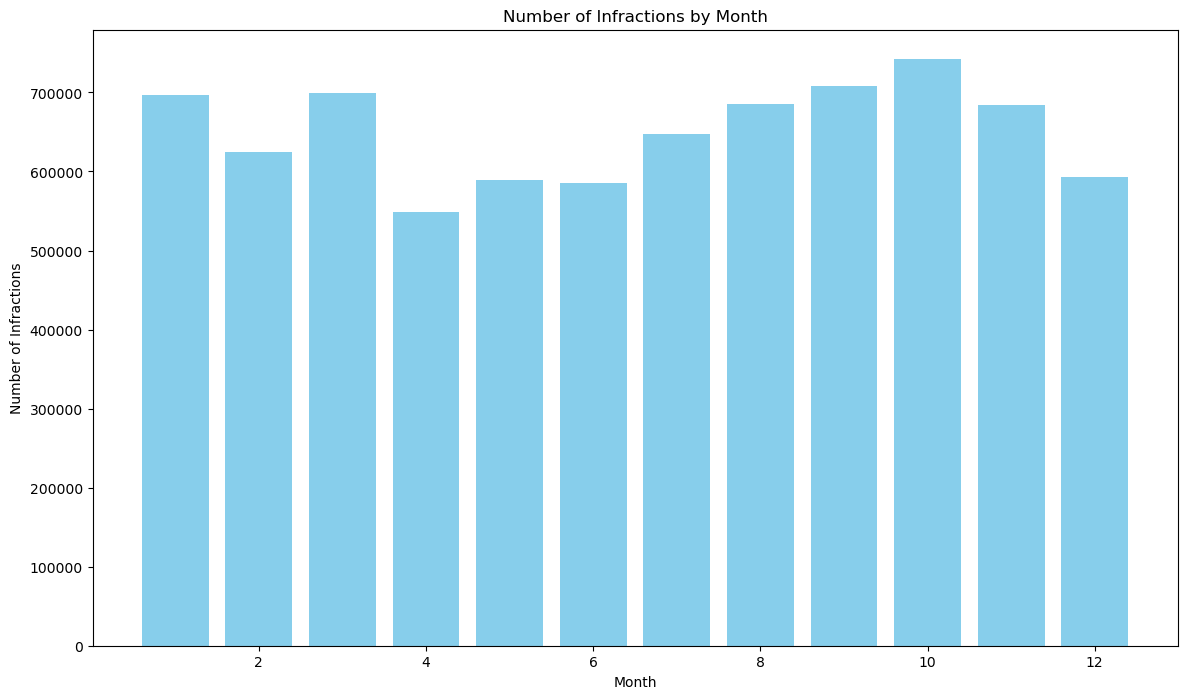

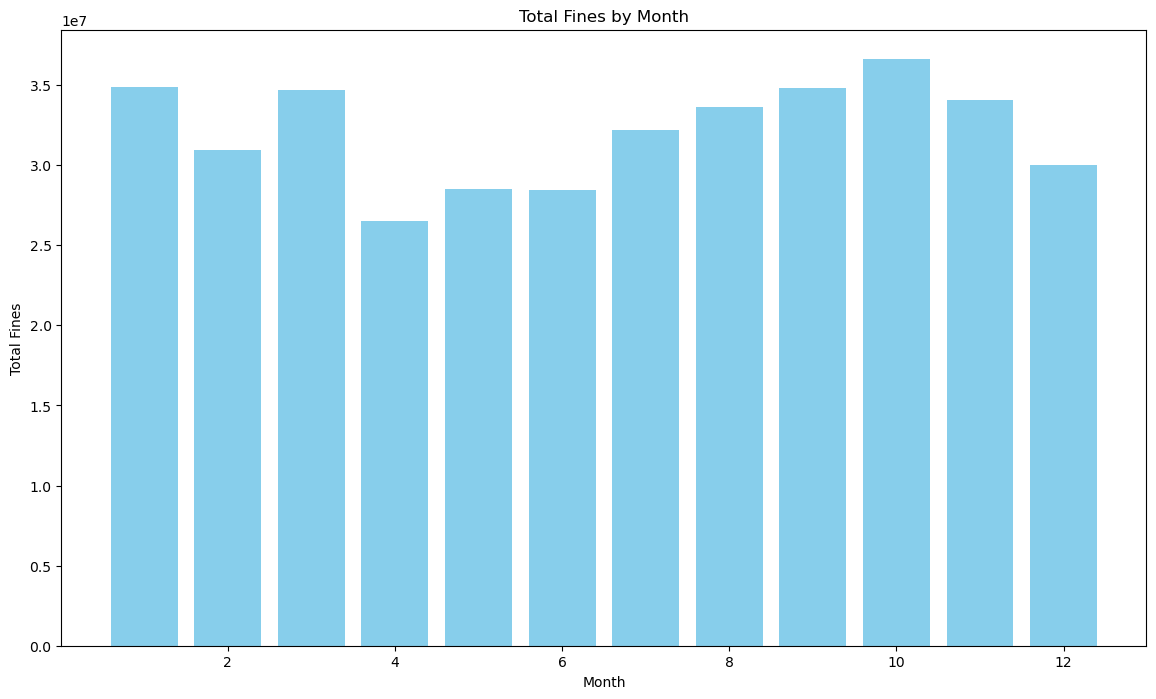

In [141]:


# Convert to datetime
df['date_of_infraction'] = pd.to_datetime(df['date_of_infraction'], format='%Y%m%d')

# Extract month
df['month'] = df['date_of_infraction'].dt.month

# Group by month
monthly_analysis = df.groupby('month').agg(
    Total_Infractions=('tag_number_masked', 'count'),
    Total_Fines=('set_fine_amount', 'sum')
).reset_index()

# Plot the number of infractions by month
plt.figure(figsize=(14, 8))
plt.bar(monthly_analysis['month'], monthly_analysis['Total_Infractions'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Infractions')
plt.title('Number of Infractions by Month')
plt.show()

# Plot the total fines by month
plt.figure(figsize=(14, 8))
plt.bar(monthly_analysis['month'], monthly_analysis['Total_Fines'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Fines')
plt.title('Total Fines by Month')
plt.show()

# no such monthly trends related to number of tickets + total fine, key insight -> 
# November is the highest




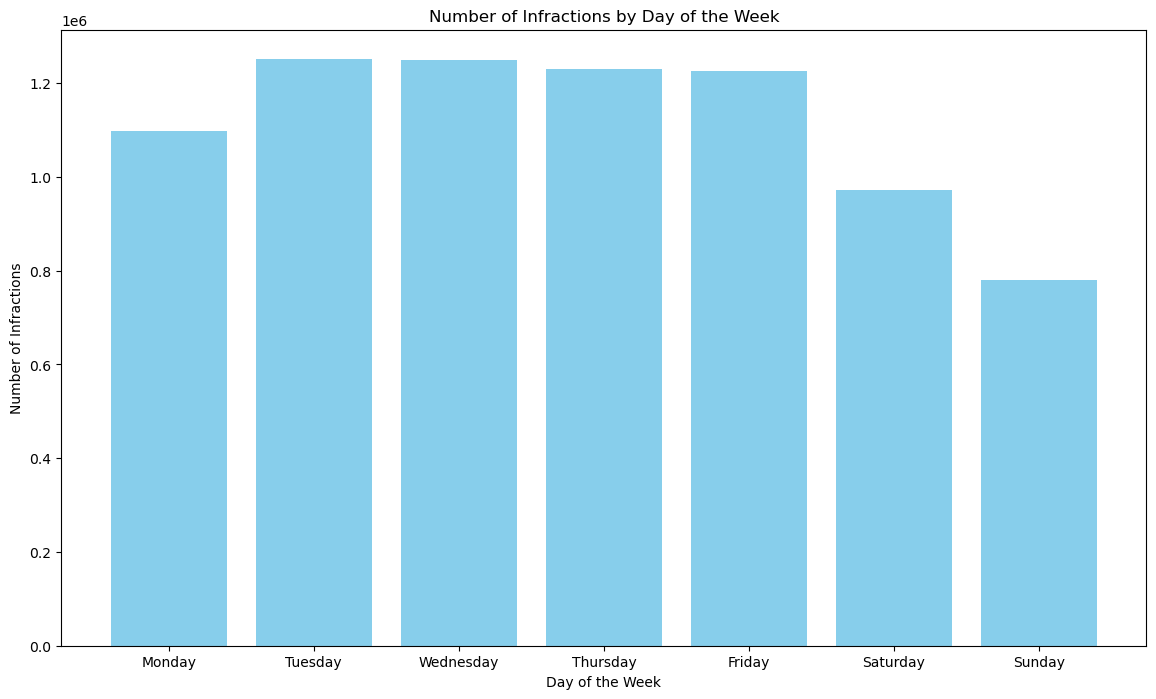

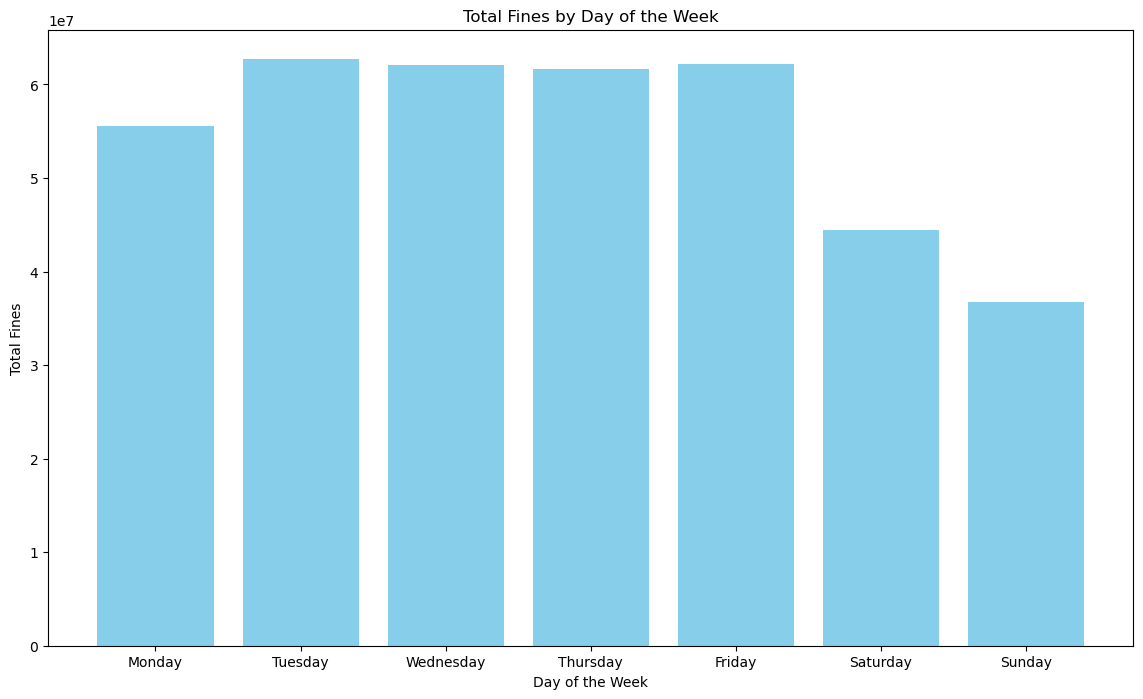

In [142]:
# Extract day of the week from 'date_of_infraction'
df['day_of_week'] = df['date_of_infraction'].dt.dayofweek

# Group by day of the week
weekly_analysis = df.groupby('day_of_week').agg(
    Total_Infractions=('tag_number_masked', 'count'),
    Total_Fines=('set_fine_amount', 'sum')
).reset_index()

# Plot the number of infractions by day of the week
plt.figure(figsize=(14, 8))
plt.bar(weekly_analysis['day_of_week'], weekly_analysis['Total_Infractions'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Infractions')
plt.title('Number of Infractions by Day of the Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

# Plot the total fines by day of the week
plt.figure(figsize=(14, 8))
plt.bar(weekly_analysis['day_of_week'], weekly_analysis['Total_Fines'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Fines')
plt.title('Total Fines by Day of the Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

# just lesser on the weekends as compared to during the week, highest on tuesdays and wednesdays



In [143]:
canada_holidays = holidays.Canada(years=[2017, 2018, 2019, 2020])
holiday_dates = pd.DataFrame(list(canada_holidays.items()), columns=['date', 'holiday_name'])
holiday_dates['date'] = pd.to_datetime(holiday_dates['date'])

df['is_public_holiday'] = df['date_of_infraction'].isin(holiday_dates['date'])

# Group by public holiday and calculate the number of infractions and total fines
daily_infractions = df.groupby('date_of_infraction').agg(
    Total_Infractions=('tag_number_masked', 'count'),
    is_public_holiday=('is_public_holiday', 'first')
).reset_index()

# Separate public holidays and non-public holidays
public_holidays = daily_infractions[daily_infractions['is_public_holiday']]
non_public_holidays = daily_infractions[~daily_infractions['is_public_holiday']]

# Take avg for each
avg_infractions_public_holidays = public_holidays['Total_Infractions'].mean()
avg_infractions_non_public_holidays = non_public_holidays['Total_Infractions'].mean()

print(f"Average infractions on public holidays: {avg_infractions_public_holidays}")
print(f"Average infractions on non-public holidays: {avg_infractions_non_public_holidays}")

Average infractions on public holidays: 2012.904761904762
Average infractions on non-public holidays: 5391.5576388888885


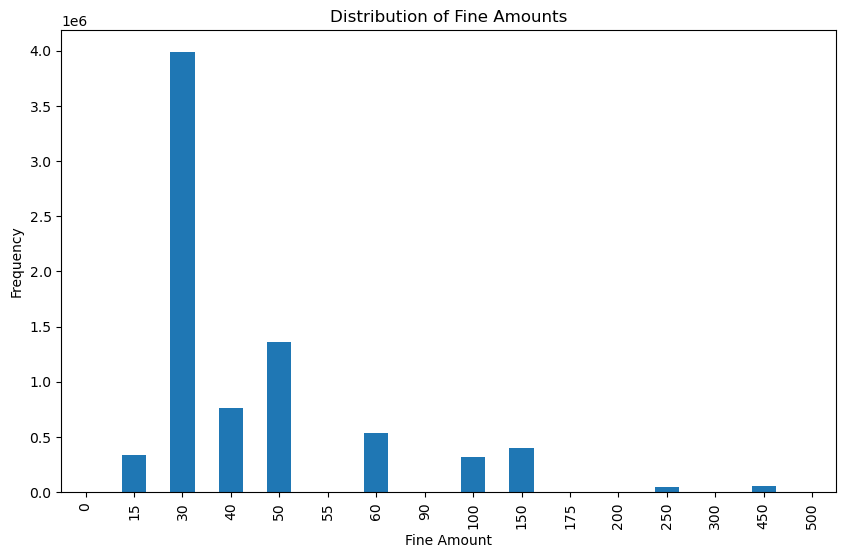

In [46]:
import matplotlib.pyplot as plt

fine_distribution = df['set_fine_amount'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
fine_distribution.plot(kind='bar')
plt.title('Distribution of Fine Amounts')
plt.xlabel('Fine Amount')
plt.ylabel('Frequency')
plt.show()


In [47]:
fine_distribution = df['set_fine_amount'].value_counts().sort_index()
fine_distribution 

0          586
15      334068
30     3987838
40      759922
50     1358540
55          80
60      532642
90        3206
100     320691
150     401642
175          7
200          9
250      50027
300       1644
450      55212
500          2
Name: set_fine_amount, dtype: int64

In [48]:
location_summary = df.groupby('location2').agg(
    Total_Tickets=('tag_number_masked', 'count'),
    Total_Fines=('set_fine_amount', 'sum')
).reset_index()

# Sorting
top_tickets_locations = location_summary.sort_values(by='Total_Tickets', ascending=False).head(10).reset_index()
top_fines_locations = location_summary.sort_values(by='Total_Fines', ascending=False).head(10).reset_index()


print("Top Locations by Number of Tickets")
print(top_tickets_locations)

print(" ")


print("Top Locations by Total Fines")
print(top_fines_locations)

Top Locations by Number of Tickets
    index            location2  Total_Tickets  Total_Fines
0  123651     2075 BAYVIEW AVE          16905       507785
1  116824         20 EDWARD ST          13888       713195
2   69260  15 MARINE PARADE DR          13028       537360
3   45361    1265 MILITARY TRL          12380       409350
4  234757       4001 LESLIE ST          11269       421755
5  111420    199 RICHMOND ST W           9967       424320
6  105185  19 GRAND TRUNK CRES           9893       624990
7    1114       1 BRIMLEY RD S           9659      1047430
8  383044        LA PLANTE AVE           9363       440560
9   13950    103 THE QUEENSWAY           9058       277080
 
Top Locations by Total Fines
    index             location2  Total_Tickets  Total_Fines
0  233598  40 ORCHARD VIEW BLVD           5225      1538310
1   96920       18 GRENVILLE ST           4577      1073365
2    1114        1 BRIMLEY RD S           9659      1047430
3  238429        410 COLLEGE ST           270

Parking on private property has been the reason for the most parking tickets, followed by parking on a highway street where it is prohibited. 

In [66]:
df['set_fine_amount'] = pd.to_numeric(df['set_fine_amount'], errors='coerce')
df['year'] = df['date_of_infraction'].dt.year
df['month'] = df['date_of_infraction'].dt.month

monthly_fines = df.groupby(['year', 'month']).agg(Total_Fines=('set_fine_amount', 'sum')).reset_index()
#monthly_fines['date_of_infraction'] = monthly_fines['date_of_infraction'].dt.to_timestamp()

pivot_table = monthly_fines.pivot(index='month', columns='year', values='Total_Fines')


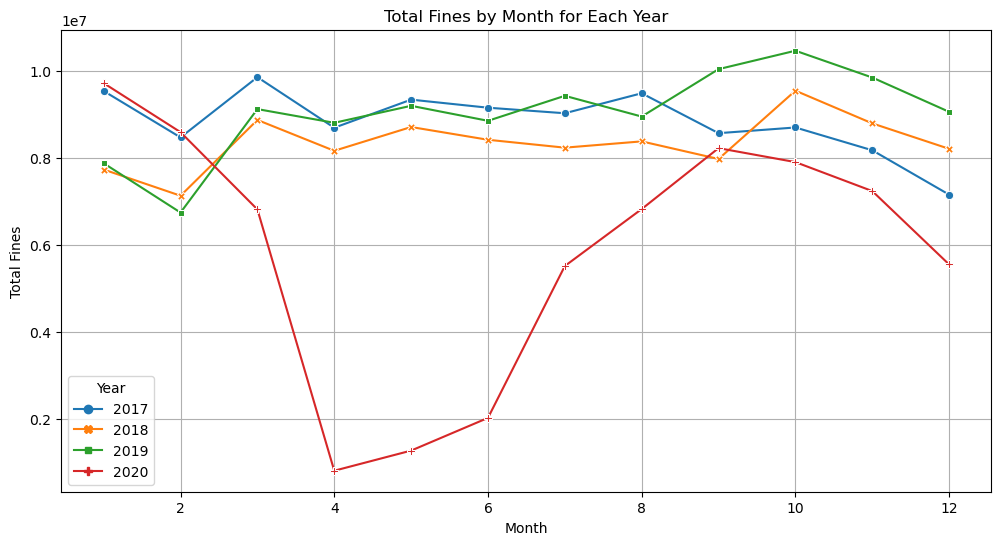

In [68]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, markers=True, dashes=False)
plt.title('Total Fines by Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Fines')
plt.legend(title='Year')
plt.grid(True)
plt.show()


In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# loading precleaned data
file_path = 'data.csv'
df = pd.read_csv(file_path)


non_numeric_times = df[~df['time_of_infraction'].astype(str).str.match(r'^\d{1,4}\.0$')]
print("Non-numeric or malformed times:")
print(non_numeric_times[['time_of_infraction']])

# Using regex to remove na vals from time_of_infraction, other methods were giving errors?
df = df[df['time_of_infraction'].astype(str).str.match(r'^\d{1,4}\.0$')]

df = df.dropna(subset=['time_of_infraction', 'date_of_infraction', 'set_fine_amount'])

# Convert to integer after removing the decimal point
df['HourOfInfraction'] = df['time_of_infraction'].astype(str).str.split('.').str[0].astype(int)


# Extract 'DayOfWeek' 
df['DayOfWeek'] = pd.to_datetime(df['date_of_infraction'], format='%Y%m%d').dt.dayofweek

df = df[df['HourOfInfraction'] < 2360]

df['HourOfInfraction'] = (df['HourOfInfraction'] // 100).astype(int)



Non-numeric or malformed times:
         time_of_infraction
513                     NaN
514                     NaN
7783                    NaN
7784                    NaN
7785                    NaN
...                     ...
7799611                 NaN
7799612                 NaN
7799613                 NaN
7799614                 NaN
7799615                 NaN

[6144 rows x 1 columns]


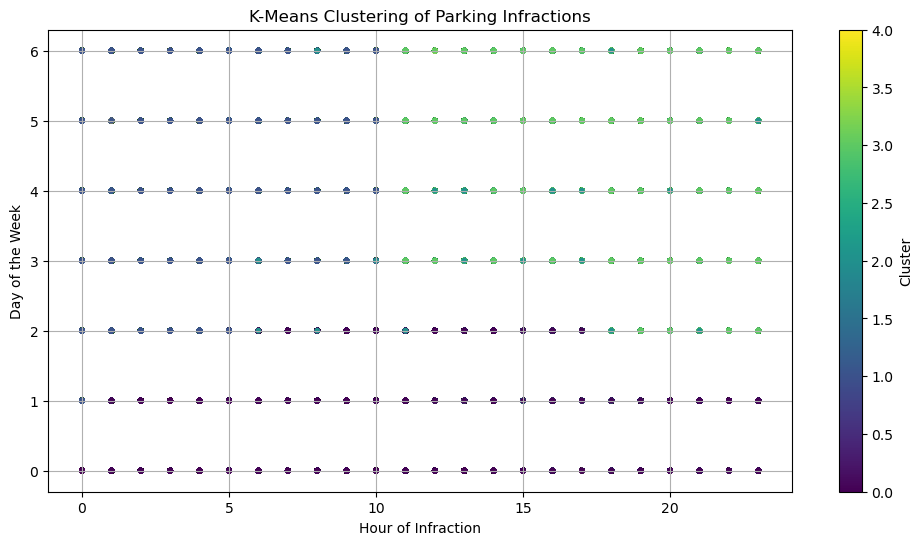

In [127]:

# Define the features for clustering
features = ['HourOfInfraction', 'DayOfWeek', 'set_fine_amount']
X = df[features]

# Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plotting the Clusters
plt.figure(figsize=(12, 6))
plt.scatter(df['HourOfInfraction'], df['DayOfWeek'], c=df['Cluster'], cmap='viridis', s=10)
plt.xlabel('Hour of Infraction')
plt.ylabel('Day of the Week')
plt.title('K-Means Clustering of Parking Infractions')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
